In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use("bmh")

In [27]:
os.getcwd()

'/Users/Susanhuynh'

In [28]:
## Read file
df = pd.read_csv("OneDrive/Python/train.csv")

In [29]:
## Peak at the data, get a general picture of the picture
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
## Get some information about the dimension of the data set (how large it is). How many columns, rows, attributes, type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### There are so much missing values in some attributes (such as MiscFeature, PoolQC...). There are so many attributes. May be we can concentrate on ones which will give us the real insights. 

In [49]:
## Let's remove "Id" columns and other features with 30% or more NaN value
df2 = pd.DataFrame()
for column in df.columns:
    a = (len(df) - df[column].count())/len(df)
    if a < 0.7:
        df2[column] = df[column].values
del df2["Id"]       
df2.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [50]:
for c in df.columns:
    if c not in df2.columns:
        print(c)
df = df2  

Id


#### Let's look at how housing price distributed

In [51]:
import seaborn as sns

In [52]:
print(df["SalePrice"].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


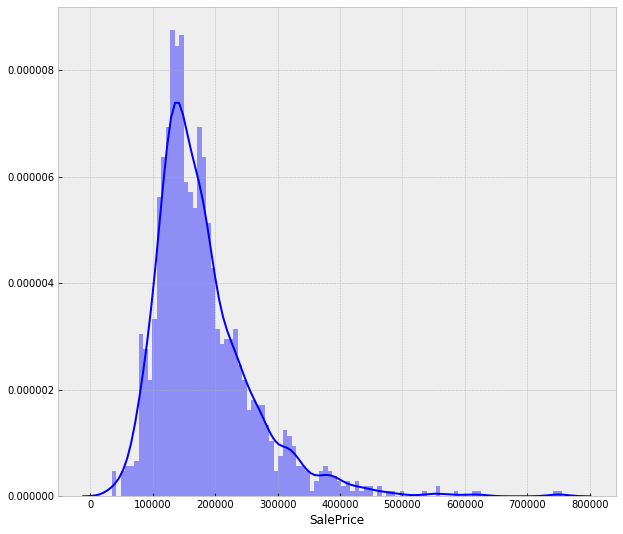

In [53]:
plt.figure(figsize=(10,9))
sns.distplot(df["SalePrice"], color="b", bins=100, hist_kws={"alpha": 0.4})

#### As we can see that prices are positive skew. Some outliers belong to around over 500,000. Eventually we will get rid of them to get normal distribution of the independent variables ("SalePrice") for machine learning.

### Numerical data distribution

In [54]:
# For this part lets look at the distribution of all of the features by ploting them
# To do so, lets first list all the types of our data from our dataset and take only the numerical ones:

In [55]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [56]:
df_num = df.select_dtypes(include = ["float64", "int64"])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


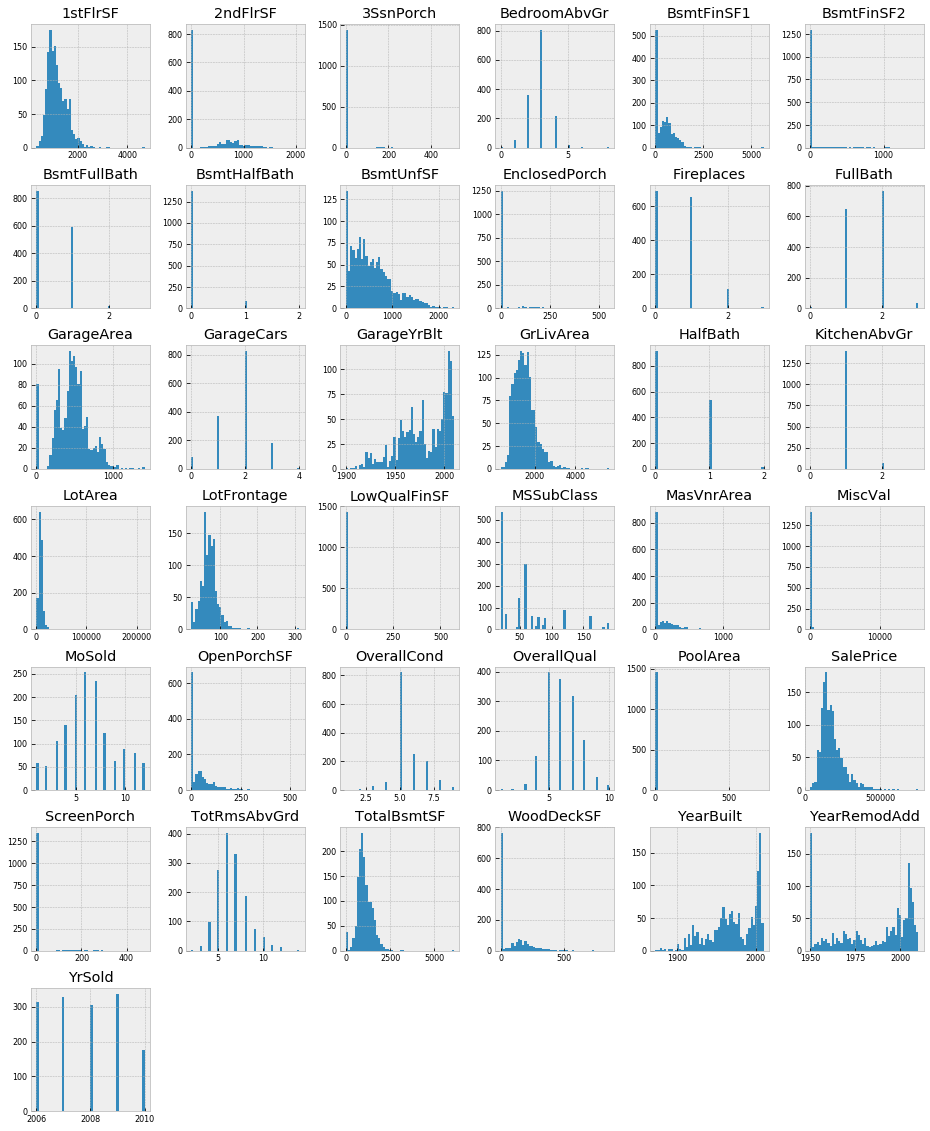

In [57]:
df_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplot lib verbose information

#### Features such as "TotalBsmSF", "LotFrontage", "LotArea", "GarageArea", "BsmUnifSF", "1stFlrSF" ... seems to have similar distribution like SalePrices. Lets see we can find new cluster later.

### Correlation

#### Now we'll try to find which features are strongly correlated with SalePrice. We'll store them in a var called golden_features_list. We'll reuse our df_num to do so.

In [58]:
df_num_corr = df_num.corr()["SalePrice"][:]
golden_features_list = df_num_corr[abs(df_num_corr)>0.5].sort_values(ascending=False)
print("This is {} strongly correlated values with SalePrice:\n {}".format(len(golden_features_list), golden_features_list))

This is 11 strongly correlated values with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


#### Now, we have a list of strongly correlated values but this list is incomplete as we know that correlation is affected by outliers. So we could proceed as follow:

- Plot the numerical features and see which ones have very few or explainable outliers.
- Remove the outliers from these features and see which one can have a good correlation without their outliers. 

#### Correlation itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the SalePrice. 

For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take features we excluded from out correlation table and plot them to see if they show some kind of pattern

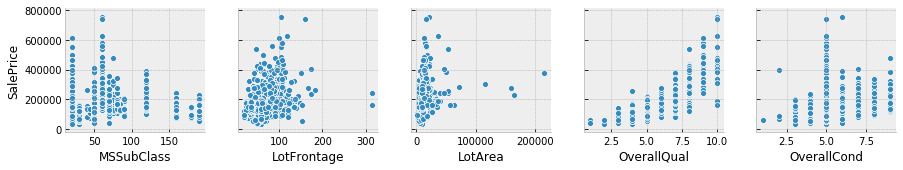

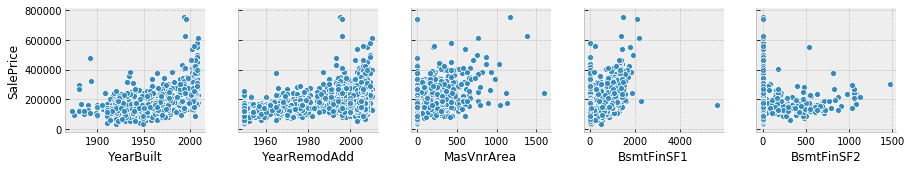

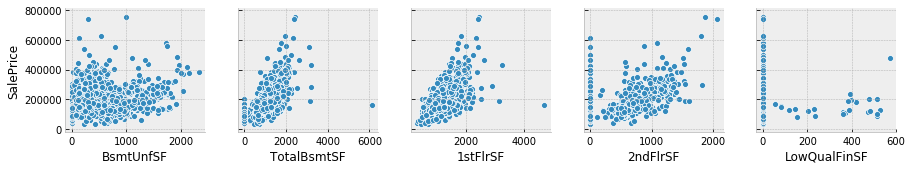

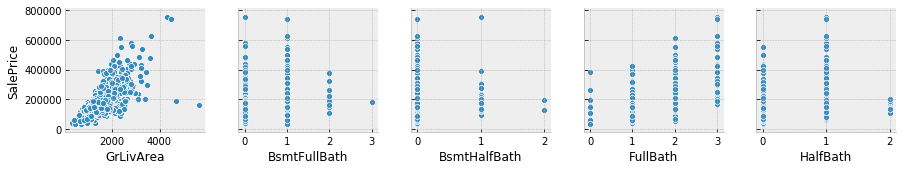

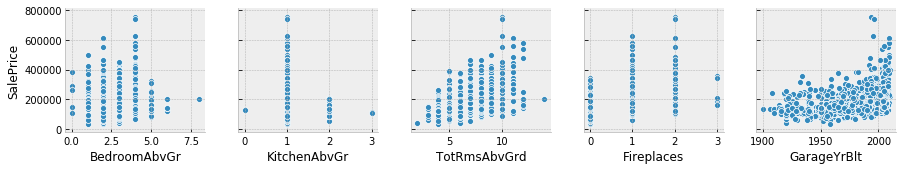

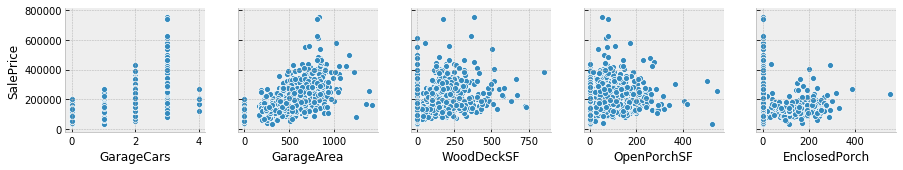

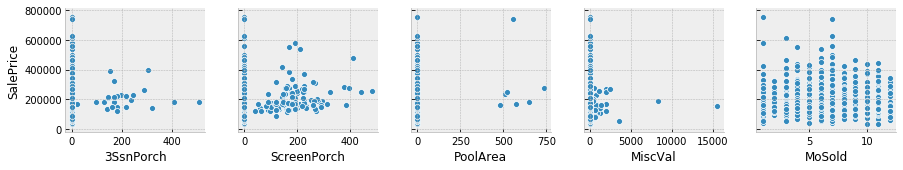

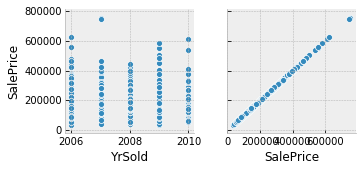

In [59]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=["SalePrice"])

#### We can clearly identify some relationships. Most of them seems to have a linear relationship with the "SalePrice" and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate that absence of such feature in the house.

#### Let's remove these 0 values and repeat the process of finding correlated values:

In [60]:
import operator

In [64]:
individual_features_df = []
for i in range(0, len(df_num.columns)-1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], "SalePrice"]]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()["SalePrice"][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key = operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key,value))


   KitchenAbvGr: -0.13920069217785566
       HalfBath: -0.08439171127179887
     MSSubClass: -0.08428413512659523
    OverallCond: -0.0778558940486776
         YrSold: -0.028922585168730426
   BsmtHalfBath: -0.028834567185481712
       PoolArea: -0.014091521506356928
   BsmtFullBath: 0.011439163340408634
         MoSold: 0.04643224522381936
      3SsnPorch: 0.06393243256889079
    OpenPorchSF: 0.08645298857147708
        MiscVal: 0.08896338917298924
     Fireplaces: 0.1216605842136395
      BsmtUnfSF: 0.16926100049514192
   BedroomAbvGr: 0.18093669310849045
     WoodDeckSF: 0.19370601237520677
     BsmtFinSF2: 0.19895609430836586
  EnclosedPorch: 0.2412788363011751
    ScreenPorch: 0.25543007954878405
        LotArea: 0.2638433538714063
   LowQualFinSF: 0.3000750165550133
    LotFrontage: 0.35179909657067854
     MasVnrArea: 0.4340902197568926
     BsmtFinSF1: 0.4716904265235731
    GarageYrBlt: 0.48636167748786213
   YearRemodAdd: 0.5071009671113867
      YearBuilt: 0.5228973328794967

#### We found another strongly correlated value by cleaning up the data a bit. Now our golden_feature_list var look like:

In [65]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]

In [67]:
print("There is {} strongly correlated values with SalePrice:\n\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:

['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


### CONCLUSION
#### By looking at correlation between numerical values, we discovered 11 features which have a strong relationship to a house price. Bidesds correlation, we didnot find any notable pattern on the data which are not correlated.

## FEATURE TO FEATURE RELATIONSHIP

#### Trying to plot all the numerical features in a seaborn pairplot will take us too much time and will be hard to interpret. We can try to see if some variables are linked between each other and then explain their relation with common sense.

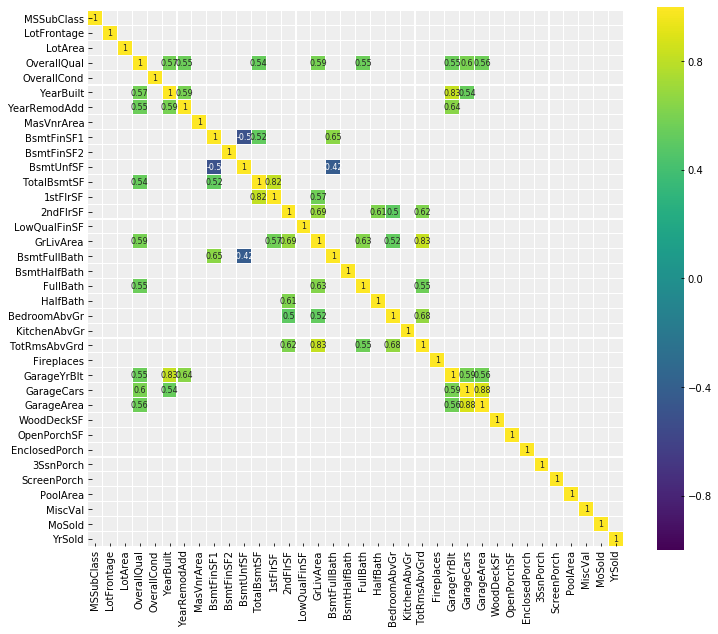

In [70]:
corr = df_num.drop("SalePrice", axis=1).corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr[(corr >=0.5) | (corr <=-0.4)],
           cmap="viridis", vmax=1.0, vmin = -1.0, linewidths = 0.1,
           annot=True, annot_kws={"size": 8}, square=True);

#### A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

Now for the ones which are less obvious we can see that:

There is a strong negative correlation between BsmtUnfSF (Unfinished square feet of basement area) and BsmtFinSF2 (Type 2 finished square feet). There is a definition of unfinished square feet here but as for a house of "Type 2", I can't tell what it really is.
HalfBath/2ndFlrSF is interesting and may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom (I'll consider that when I'll buy myself a house uh...)
There is of course a lot more to discover but I can't really explain the rest of the features except the most obvious ones.

We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features (`1stFlrSF`/`TotalBsmtSF`, `GarageCars`/`GarageArea`) and others indicates that people expect multiples features to be packaged together.

### Q -> Q (QUANTITATIVE TO QUANTITATIVE RELATIONSHIP)
Let's now examine the quantitative features of our dataframe and how they relate to the SalePrice which is also quantitative (hence the relation Q -> Q). I will conduct this analysis with the help of the Q -> Q chapter of the Standford MOOC

Some of the features of our dataset are categorical. To separate the categorical from quantitative features lets refer ourselves to the data_description.txt file. According to this file we end up with the folowing columns:

In [71]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
    'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

In [72]:
df_quantitative_features_list = df[quantitative_features_list]
df_quantitative_features_list.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


#### Still, we have a lot of features to analyse here so let's take the strongly correlated quantitative features from this dataset and analyse them one by one

In [74]:
features_to_analyse = [x for x in df_quantitative_features_list if x in golden_features_list]
features_to_analyse.append("SalePrice")

In [75]:
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

#### Let's look at their distribution.

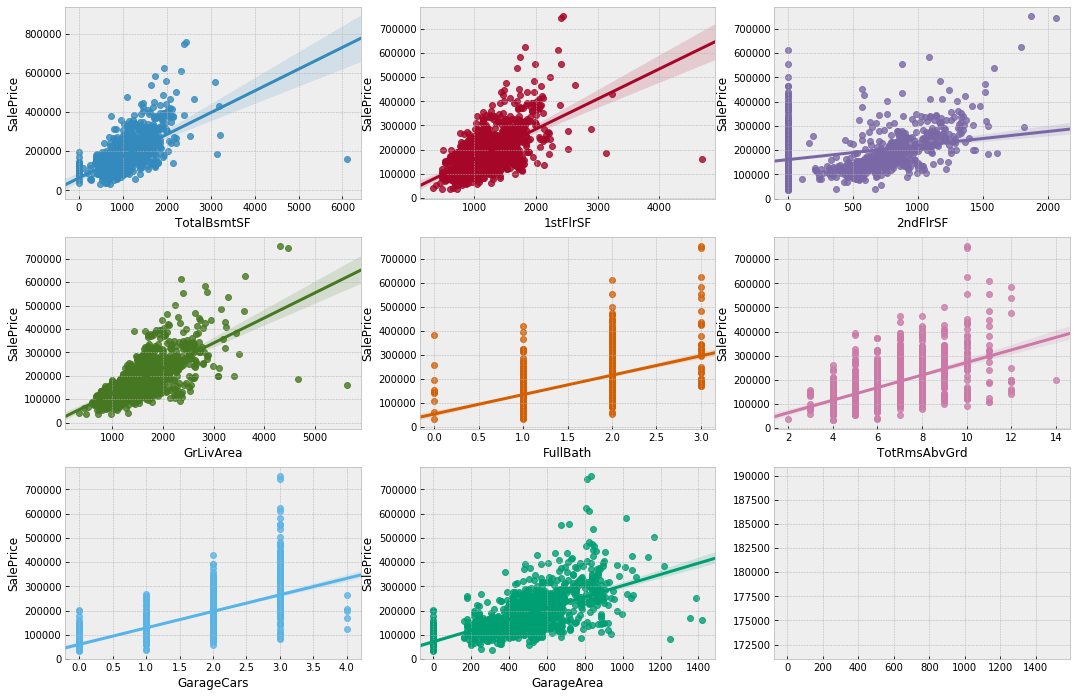

In [77]:
fig, ax = plt.subplots(round(len(features_to_analyse)/3), 3, figsize = (18,12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) -1:
        sns.regplot(x=features_to_analyse[i], y = "SalePrice", data=df[features_to_analyse], ax = ax)

#### We can see that features such as TotalBsmtSF, 1stFlrSF, GrLivArea have a big spread but I cannot tell what insights this information gives us

### C -> Q (CATEGORICAL TO QUANTITATIVE RELATIONSHIP)

#### Lets get all the categorical features of our dataset and see if we can find some insight in them. Instead of opening back our data_description.txt file and checking which data are categorical, lets just remove quantitative_features_list from our entire dataframe.

In [80]:
categorical_features = [a for a in df.columns if a not in quantitative_features_list[:-1]]

In [81]:
df_categ = df[categorical_features]
df_categ.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2003.0,RFn,TA,TA,Y,2,2008,WD,Normal,208500
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,1976.0,RFn,TA,TA,Y,5,2007,WD,Normal,181500
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,2001.0,RFn,TA,TA,Y,9,2008,WD,Normal,223500
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,1998.0,Unf,TA,TA,Y,2,2006,WD,Abnorml,140000
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,2000.0,RFn,TA,TA,Y,12,2008,WD,Normal,250000


In [83]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 39 non numerical features including:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


#### Looking at these features we can see that a lot of them are of the type `Object(O)`. In our data transformation notebook we could use [Pandas categorical functions](http://pandas.pydata.org/pandas-docs/stable/categorical.html) (equivalent to R's factor) to shape our data in a way that would be interpretable for our machine learning algorithm. `ExterQual` for instace could be transformed to an ordered categorical object.



(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

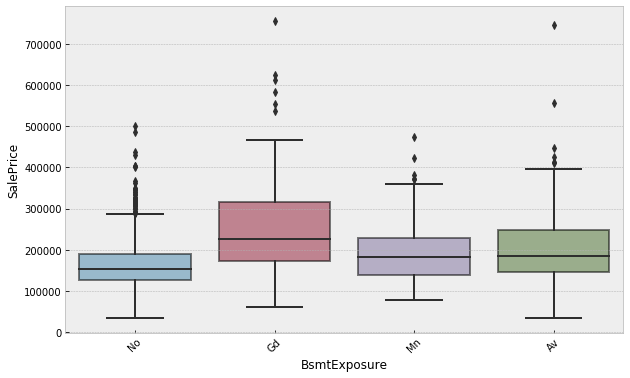

In [85]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

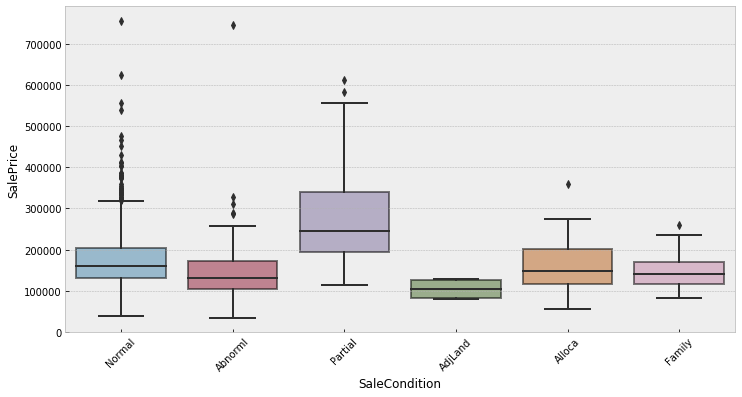

In [86]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='SaleCondition', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

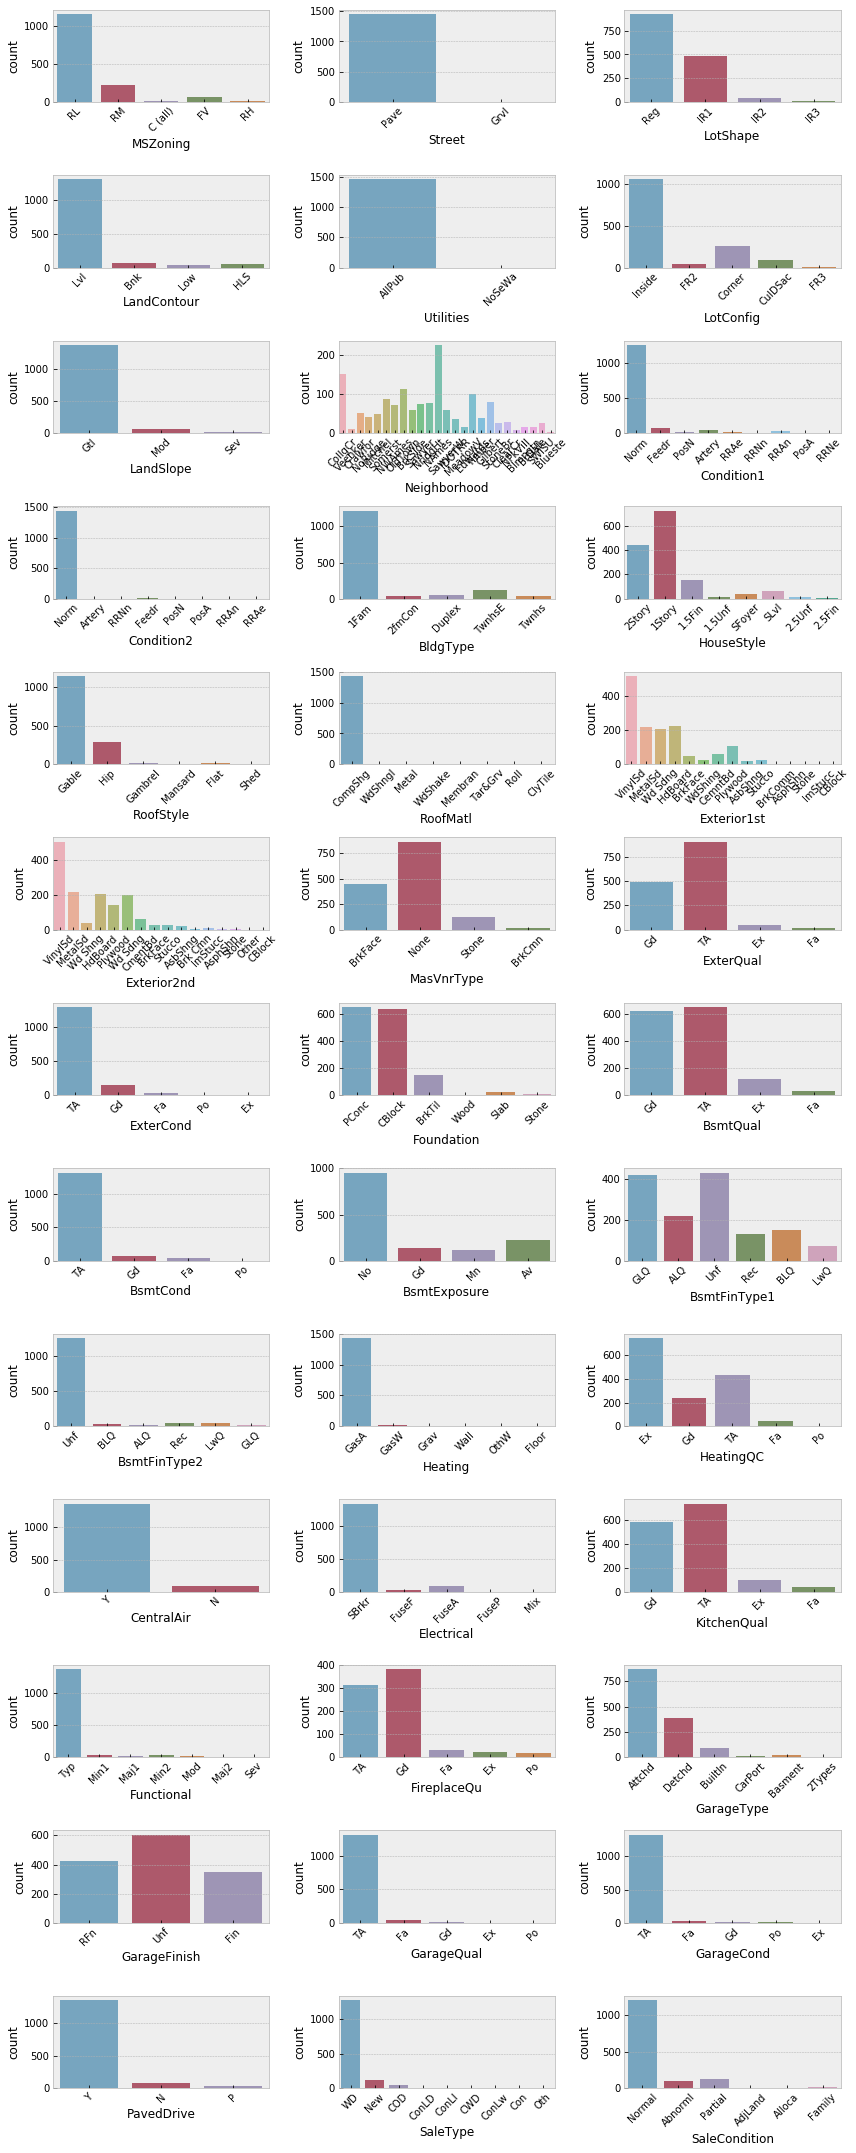

In [88]:
fig, axes = plt.subplots(round(len(df_not_num.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

#### We can see that some categories are predominant for some features such as `Utilities`, `Heating`, `GarageCond`, `Functional`... These features may not be relevant for our predictive model